#### Context :

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content :

The dataset consists of credit card transactions made by European cardholders in September 2013. It covers a span of two days with a total of 284,807 transactions, out of which 492 are identified as fraudulent. The dataset exhibits a high level of imbalance, with fraudulent transactions accounting for only 0.172% of the total.

#### Problem Statement :

we aim to classify credit card fraud using the Class dependent variable provided in 
the (creditcard.csv) dataset

In [42]:
# Import necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


## A. Data Collection ----------------------------------------------

In [2]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## B. Data Preprocessing --------------------------------------------

### 1. Data Cleaning 

In [11]:
print(f"Total columns {len(df.columns)}")
print('-'*20)
print(f"Columns are : {df.columns}")
print('-'*20)
print(f"Duplicate values in the dataset are : \n{df.duplicated().value_counts()}")

Total columns 31
--------------------
Columns are : Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
--------------------
Duplicate values in the dataset are : 
False    283726
True       1081
dtype: int64


In [12]:
# dataset has douplicate rows so will remove them 
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

Observations :
* Zero null values found in the dataset
* Except the class column all other columns are float64
* There are 284807 rows in the dataset from which 283726 rows are unique

In [16]:
# value counts after removing the duplicate rows
df.Class.value_counts()[:10]

0    283253
1       473
Name: Class, dtype: int64

* So the data set is highly imbalanced , it will give us good accuracy but the model will perform bad on the test dataset. 
* To increase the f1 score for both classes we have to do down_sampling


### 2. EDA (Exploratory Data Analysis)

Non Fraud %  99.83
Fraud %     0.17


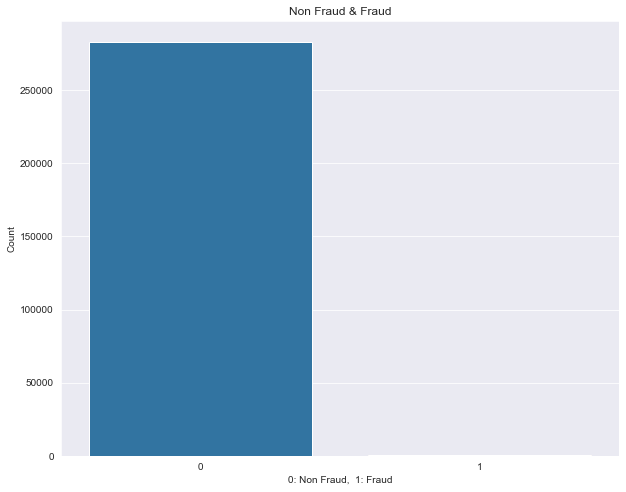

In [25]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts())
plt.title('Non Fraud & Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2));

We can see the total of 283,726 transactions, 283253 were labeled as normal, and only 473 transactions were labeled as fraud . Although it may seem small, each fraud transaction can represent a very significant expense, which together can represent billions of dollars of lost revenue each year.

### 3. Feature Selection

In [47]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]

### 4. Train_Test_Split
Now we will create x_train, y_train, x_text, y_test for model selection and evaluation .

we will be using train_test_split with the help of sklearn libraries

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_features, data_target, test_size = 0.2, random_state = 42)

## C.  Model Selection ----------------------------------------------

In [56]:
# Build the model
# This is a clssification problrm so we will use Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Logistic Regression is mainly used for :
* Binary Classification problems.
* When we want a simple and interpretable model and don't want to deal with the complexity of more advanced models, logistic regression is a good choice.

## D. Model Evaluation ----------------------------------------------

In [55]:
model.fit(x_train, y_train)

# Evaluate model performance
y_pred = model.predict(x_test)

# Print metrics
print(classification_report(y_test, y_pred))
print(f'Area under ROC curve: {roc_auc_score(y_test, y_pred)}')

# Interpret coefficients
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0]})
print(coefficients)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746

Area under ROC curve: 0.7666137155229219
   Feature  Coefficient
0       V1    -0.042425
1       V2    -0.283290
2       V3     0.014319
3       V4     0.500514
4       V5    -0.341757
5       V6     0.168730
6       V7     0.650473
7       V8    -0.208029
8       V9    -0.267932
9      V10    -0.889505
10     V11     0.085115
11     V12    -0.135746
12     V13    -0.328546
13     V14    -0.517506
14     V15    -0.124403
15     V16    -0.463438
16     V17    -0.050116
17     V18     0.183234
18     V19    -0.119444
19     V20     1.377802
20     V21     0.573829
21     V22     0.239920
22     V23    -0.230078
23     V24    -0.041078
24     V25    -0.197354
25     V

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

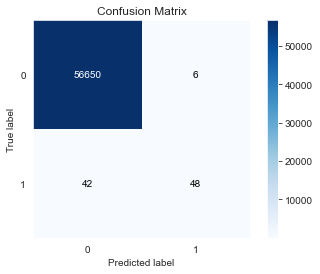

In [58]:
# plotting the confusion matrix 
skplt.metrics.plot_confusion_matrix(y_test, y_pred)